# Flower Prediction using CNN

A CNN model created to classsify the flowers dataset into 4 categories : 
* Daisy
* Dandelion
* Rose (or)
* Sunflower

## Importing necessary modules 

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline  


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder


from keras.preprocessing.image import ImageDataGenerator


from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical


from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D 
 
import tensorflow as tf
import random as rn


import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle 

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Gathering dataset and labelling the images

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
Flower_Daisy='/content/gdrive/MyDrive/FlowerPrediction_CNN/Daisy'
Flower_Dandelion='/content/gdrive/MyDrive/FlowerPrediction_CNN/Dandelion'
Flower_Rose='/content/gdrive/MyDrive/FlowerPrediction_CNN/Rose'
Flower_Sunflower='/content/gdrive/MyDrive/FlowerPrediction_CNN/Sunflower'

In [ ]:
def categories(img,flower_type):
  return flower_type

In [ ]:
X=[]
y=[]
IMG_SIZE=150

In [ ]:
def make_train_data(flower_type,location):
  for img in tqdm(os.listdir(location)):
    try:
      label=categories(img,flower_type)
      path = os.path.join(location,img)
      img = cv2.imread(path,cv2.IMREAD_COLOR)
      img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
      X.append(np.array(img))
      y.append(str(label))
      
    except Exception as e:
        pass

In [ ]:
make_train_data('Daisy',Flower_Daisy)
print(len(X))

100%|██████████| 520/520 [01:57<00:00,  4.42it/s]

520


In [ ]:
make_train_data('Dandelion',Flower_Dandelion)
print(len(X))

100%|██████████| 478/478 [01:49<00:00,  4.38it/s]

998


In [ ]:
make_train_data('Rose',Flower_Rose)
print(len(X))

100%|██████████| 453/453 [02:07<00:00,  3.54it/s]

1451


In [ ]:
make_train_data('Sunflower',Flower_Sunflower)
print(len(X))

100%|██████████| 471/471 [02:37<00:00,  2.99it/s]

1921


## Data Visualization

In [ ]:
import random as rn

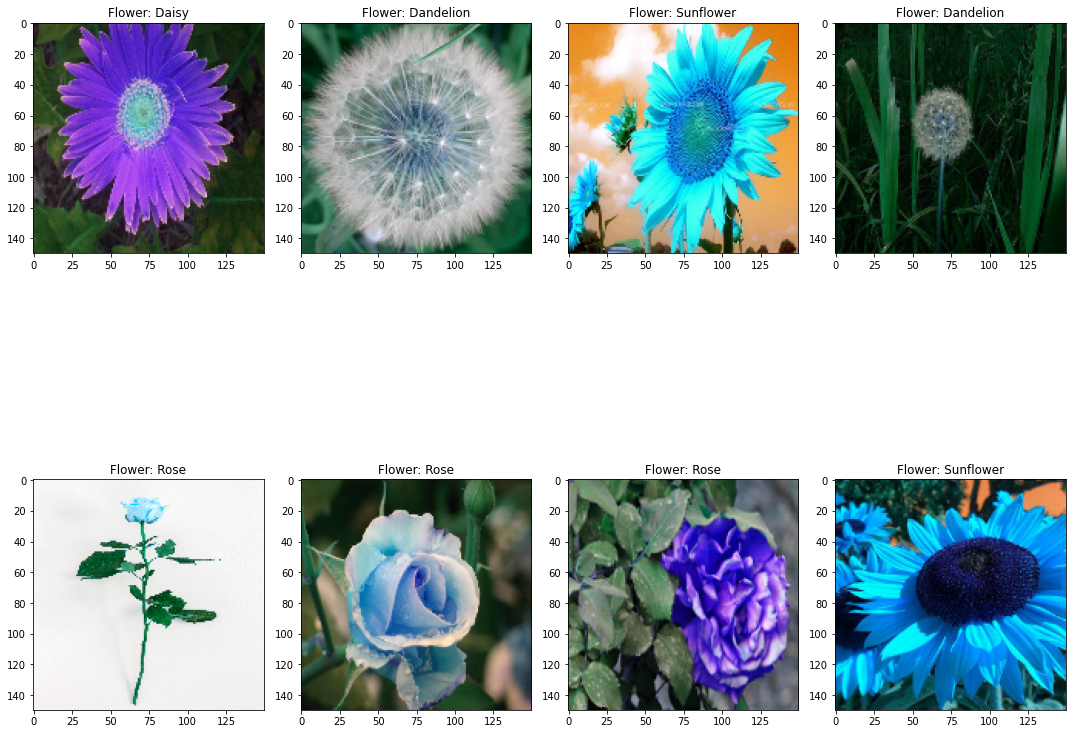

In [ ]:
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,15)
for i in range(2):
    for j in range (4):
        m=rn.randint(0,len(y))
        ax[i,j].imshow(X[m])
        ax[i,j].set_title('Flower: '+y[m])
        
plt.tight_layout()

In [ ]:
le=LabelEncoder()
y_label=le.fit_transform(y)
y_label=to_categorical(y_label,4)
X=np.array(X)
X=X/255

In [ ]:
X.shape

(1921, 150, 150, 3)

In [ ]:
y_label.shape

(1921, 4)

## Splitting the dataset into train , test and validation dataset

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X,y_label,test_size=0.1,random_state=40)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.1,random_state=40)

In [ ]:
X_train.shape

(1555, 150, 150, 3)

In [ ]:
X_val.shape

(193, 150, 150, 3)

In [ ]:
X_test.shape

(173, 150, 150, 3)

In [ ]:
y_test.shape

(173, 4)

In [ ]:
np.random.seed(40)
rn.seed(40)
tf.random.set_seed(40)

## Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=50,  
        zoom_range = 0.1, 
        width_shift_range=0.2, 
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=True)   


datagen.fit(X_train)

In [ ]:
X_train.shape

(1555, 150, 150, 3)

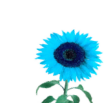

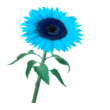

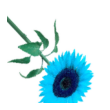

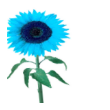

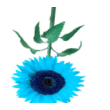

In [ ]:
gen = datagen.flow(X_train[1:2], batch_size=1)  # Takes data & label arrays, generates batches of augmented data
for i in range(1, 6):
  plt.figure(figsize=(10,10))
  plt.subplot(1,5,i)
  plt.axis("off")
  plt.imshow(gen.next().squeeze())
  plt.plot()
plt.show()

## Building CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(4, activation = "softmax"))

In [ ]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau  # Reduce learning rate when a metric has stopped improving.
reduce_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 96)       

## Training our model

In [ ]:
History = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50
12/12 [==============================] - 7s 578ms/step - loss: 1.4116 - accuracy: 0.2871 - val_loss: 1.0943 - val_accuracy: 0.5285
Epoch 2/50
12/12 [==============================] - 7s 546ms/step - loss: 1.0995 - accuracy: 0.5376 - val_loss: 0.8315 - val_accuracy: 0.6218
Epoch 3/50
12/12 [==============================] - 7s 606ms/step - loss: 0.8652 - accuracy: 0.6393 - val_loss: 0.7428 - val_accuracy: 0.6839
Epoch 4/50
12/12 [==============================] - 7s 569ms/step - loss: 0.7497 - accuracy: 0.7070 - val_loss: 0.7085 - val_accuracy: 0.7202
Epoch 5/50
12/12 [==============================] - 7s 551ms/step - loss: 0.7328 - accuracy: 0.7019 - val_loss: 0.7432 - val_accuracy: 0.7254
Epoch 6/50
12/12 [==============================] - 7s 568ms/step - loss: 0.6721 - accuracy: 0.7258 - val_loss: 0.8058 - val_accuracy: 0.6321
Epoch 7/50
12/12 [==============================] - 7s 549ms/step - loss: 0.7163 - accuracy: 0.6959 - val_loss: 0.6219 - val_accuracy: 0.7306
Epoch 

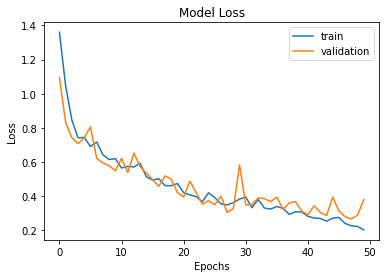

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

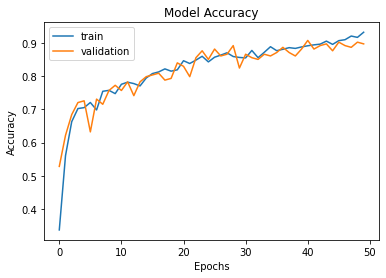

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
predictions = model.predict(X_test)
y_pred=np.argmax(predictions,axis=1)

In [ ]:
correct_pred = []
wrong_pred = []

In [ ]:
for i in range(0,len(y_test)):
    if(np.argmax(y_test[i])==y_pred[i]):
        correct_pred.append(i)

In [ ]:
np.shape(correct_pred)

(162,)

In [ ]:
for i in range(0,len(y_test)):
    if(not np.argmax(y_test[i])==y_pred[i]):
        wrong_pred.append(i)

In [ ]:
np.shape(wrong_pred)

(11,)

## Correct Predictions

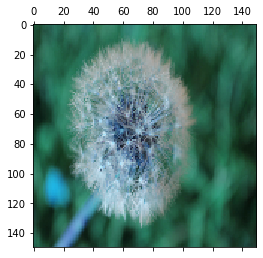

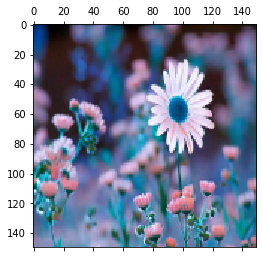

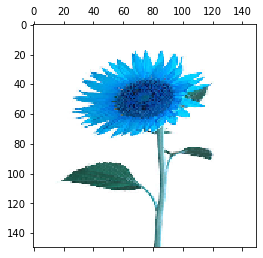

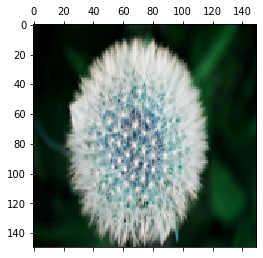

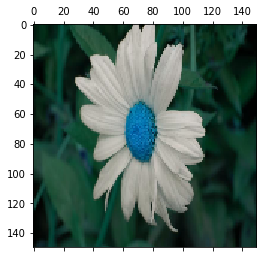

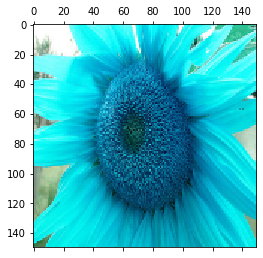

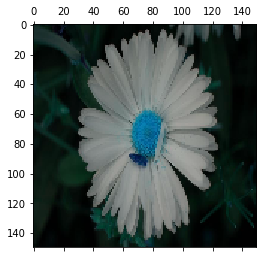

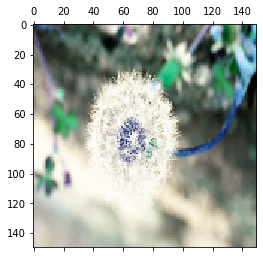

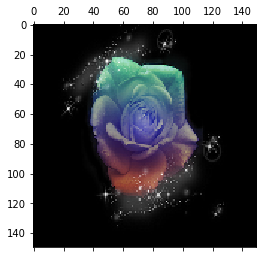

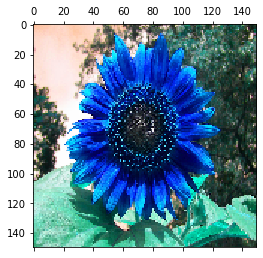

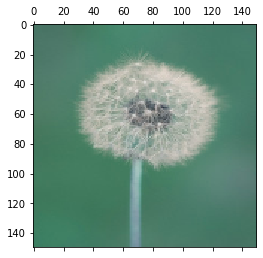

In [ ]:
for i in range(0,11):
  plt.matshow(X_test[correct_pred[i]])

In [ ]:
for i in range(0,11):
  if (y_pred[correct_pred[i]]==0):
    print("Daisy")
  elif (y_pred[correct_pred[i]]==1):
    print("Dandelion")
  elif (y_pred[correct_pred[i]]==2):
    print("Rose")
  else:
    print("Sunflower")

Dandelion
Daisy
Sunflower
Dandelion
Daisy
Sunflower
Daisy
Dandelion
Rose
Sunflower
Dandelion


## Incorrect Predictions

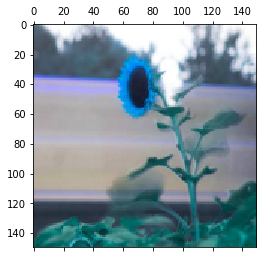

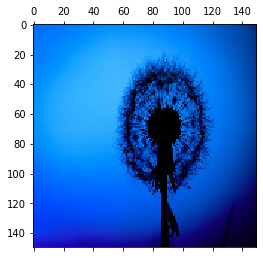

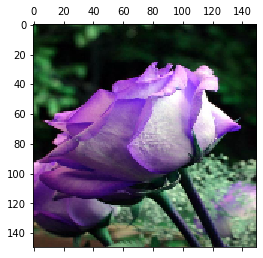

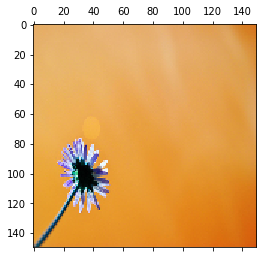

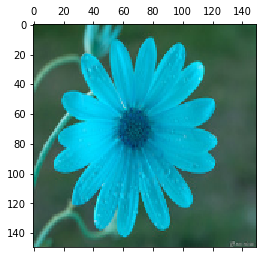

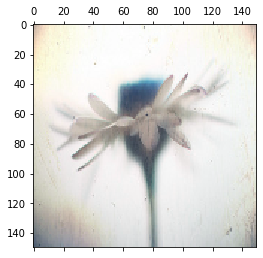

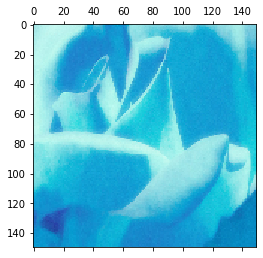

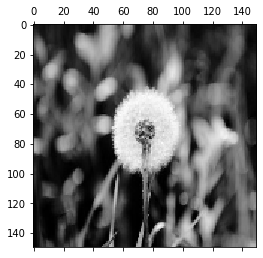

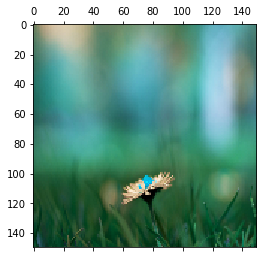

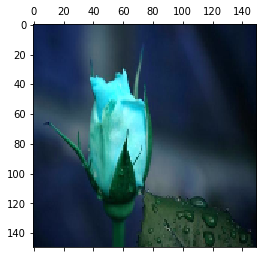

In [ ]:
for i in range(0,10):
  plt.matshow(X_test[wrong_pred[i]])

In [ ]:
 for i in range(0,10):
  if (y_pred[wrong_pred[i]]==0):
    print("Daisy")
  elif (y_pred[wrong_pred[i]]==1):
    print("Dandelion")
  elif (y_pred[wrong_pred[i]]==2):
    print("Rose")
  else:
    print("Sunflower")

Daisy
Sunflower
Daisy
Dandelion
Sunflower
Dandelion
Sunflower
Daisy
Sunflower
Dandelion
